In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu122


Looking in indexes: https://download.pytorch.org/whl/cu122


ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch


In [1]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Devices:", tf.config.list_physical_devices('GPU'))


Num GPUs Available: 0
GPU Devices: []


In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 612M/612M [09:38<00:00, 1.11MB/s]

Extracting files...


Path to dataset files: C:\Users\ravis\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [5]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

In [13]:
import shutil
import os

# Paths
source_path = r"C:\Users\ravis\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1"
destination_path = os.getcwd()  # This is your current working directory

# Copy everything from source to destination
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"✅ Dataset moved to {destination_path}")


✅ Dataset moved to C:\Users\ravis\OneDrive\Desktop\traffic sign detection\trafic_sign


In [15]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [17]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [19]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(r'C:\Users\ravis\OneDrive\Desktop\traffic sign detection\trafic_sign', 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [21]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

In [25]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 137s 542ms/step - accuracy: 0.4289 - loss: 3.8903 - val_accuracy: 0.9638 - val_loss: 0.1574
Epoch 2/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 131s 531ms/step - accuracy: 0.9420 - loss: 0.2342 - val_accuracy: 0.9833 - val_loss: 0.0711
Epoch 3/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 143s 536ms/step - accuracy: 0.9627 - loss: 0.1438 - val_accuracy: 0.9889 - val_loss: 0.0514
Epoch 4/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 142s 537ms/step - accuracy: 0.9802 - loss: 0.0778 - val_accuracy: 0.9885 - val_loss: 0.0473
Epoch 5/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 142s 535ms/step - accuracy: 0.9816 - loss: 0.0684 - val_accuracy: 0.9842 - val_loss: 0.0646
Epoch 6/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 132s 536ms/step - accuracy: 0.9752 - loss: 0.0952 - val_accuracy: 0.9912 - val_loss: 0.0371
Epoch 7/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 133s 540ms/step - accuracy: 0.9891 - loss: 0.0402 - val_accuracy: 0.9932 - val_loss: 0.0366
Epoch 8/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 133s 539ms/step - accuracy: 0.9873 -

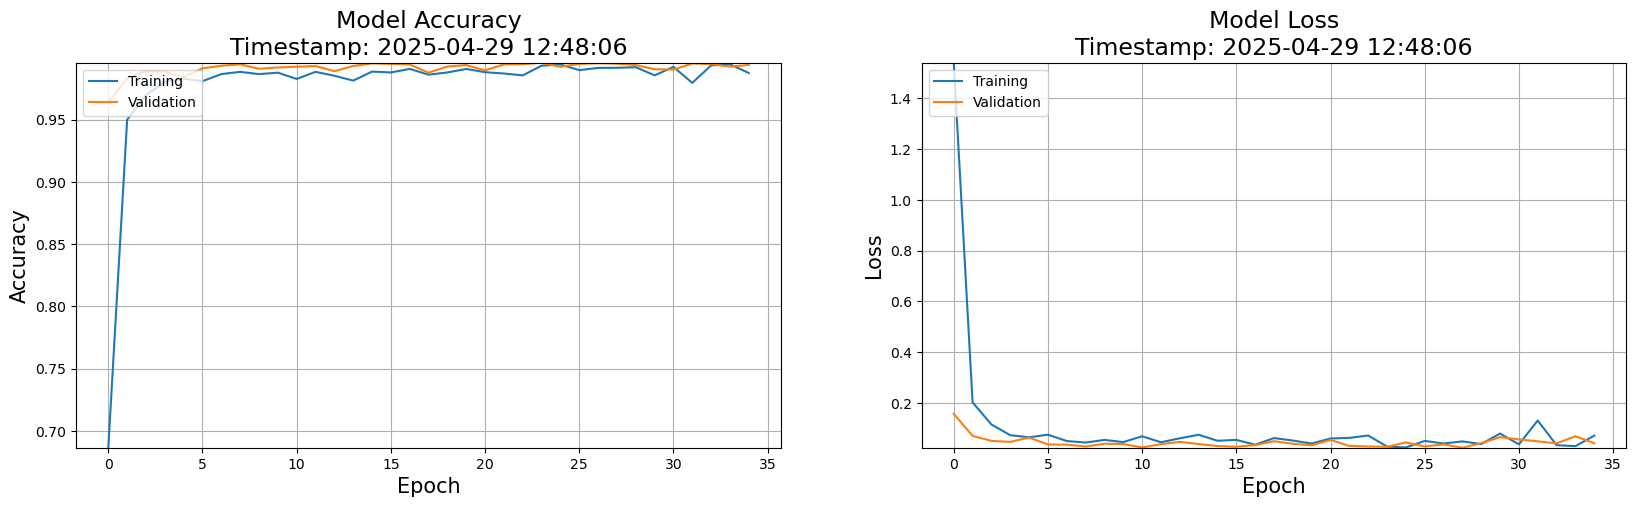

In [29]:
plot_performance(history=history1)

In [37]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print("GPUs Available:", gpus)


GPUs Available: []


In [33]:
!pip uninstall tensorflow
!pip install tensorflow


^C


In [39]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv(r'C:\Users\ravis\OneDrive\Desktop\traffic sign detection\trafic_sign\Test.csv')


labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open(os.path.join(r'C:\Users\ravis\OneDrive\Desktop\traffic sign detection\trafic_sign', img))

        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [41]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step
0.9661916072842439


In [43]:
# Saving the Model 
model.save('traffic_classifier.h5')

In [9]:
from PIL import Image
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("traffic_classifier.h5")

def predict_traffic_sign(image_path):
    try:
        # Load and show image
        image = Image.open(image_path)
        image.show()  # <<< This will open the image in the default viewer

        # Preprocess image
        image = image.resize((30, 30))
        image = np.array(image)

        if image.shape[-1] == 4:
            image = image[:, :, :3]
        
        image = image / 255.0
        image = image.reshape(1, 30, 30, 3)

        # Prediction
        prediction = model.predict(image)
        class_index = np.argmax(prediction)

        print(f"Predicted Class Index: {class_index}")
        return class_index

    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage
image_path = r"C:\Users\ravis\OneDrive\Desktop\traffic_sign_recogniztion\trafic_sign\Test\00264.png"
predict_traffic_sign(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
Predicted Class Index: 5


5

In [5]:
import os

def count_classes(data_dir):
    try:
        # List all subdirectories (each representing a class)
        class_names = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
        
        num_classes = len(class_names)
        print(f"Number of classes: {num_classes}")
        print("Class folders:", class_names)
        return num_classes

    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage
data_folder = r"C:\Users\ravis\OneDrive\Desktop\traffic_sign_recogniztion\trafic_sign\Train"
count_classes(data_folder)


Number of classes: 43
Class folders: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


43

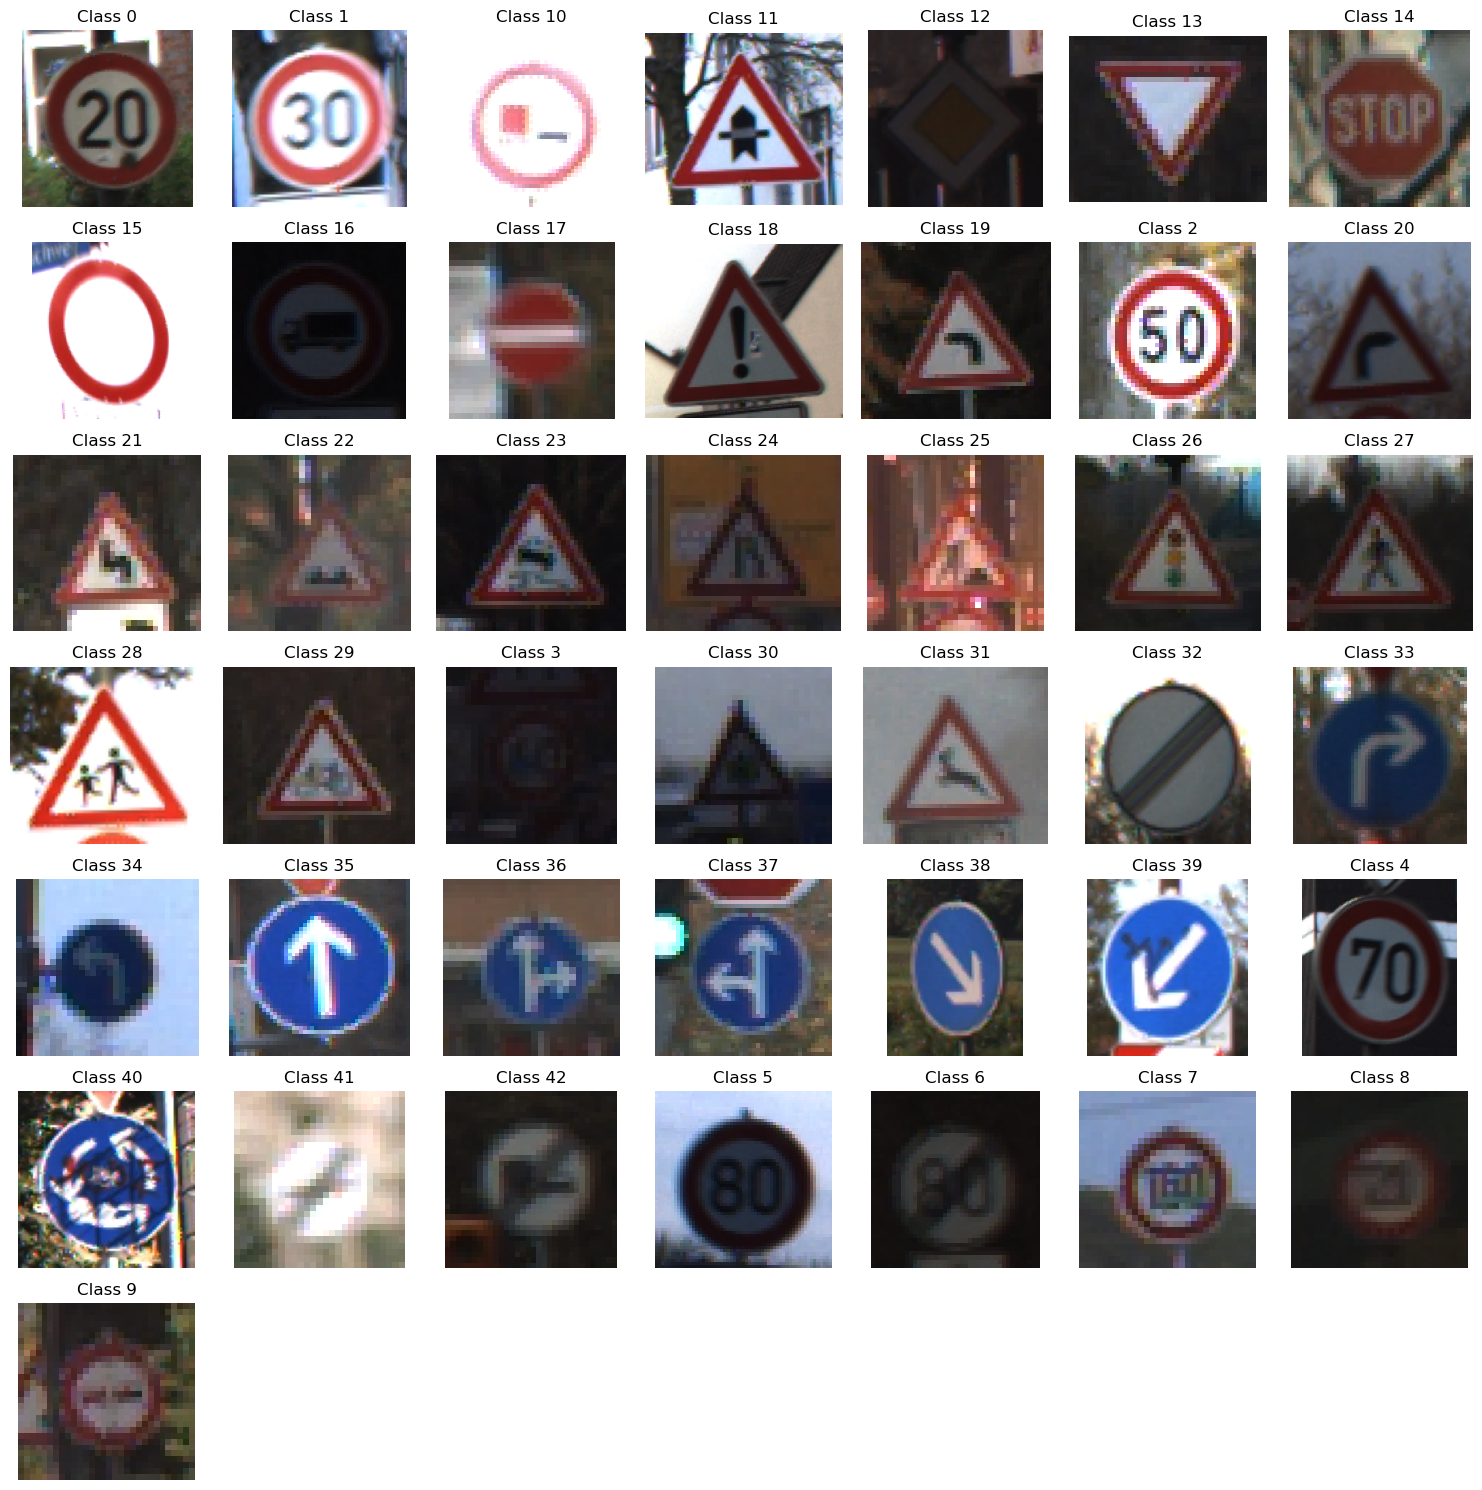

In [31]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_random_image_per_class(data_dir):
    class_folders = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    
    num_classes = len(class_folders)
    cols = 7
    rows = (num_classes + cols - 1) // cols  # Ceiling division

    plt.figure(figsize=(15, 15))

    for idx, class_name in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not image_files:
            continue  # Skip if folder is empty

        # Randomly select an image
        image_file = random.choice(image_files)
        image_path = os.path.join(class_path, image_file)
        image = Image.open(image_path)

        plt.subplot(rows, cols, idx + 1)
        plt.imshow(image)
        plt.title(f"Class {class_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
data_folder = r"C:\Users\ravis\OneDrive\Desktop\traffic_sign_recogniztion\trafic_sign\Train"
show_random_image_per_class(data_folder)


In [5]:
from PIL import Image
import tensorflow as tf
import numpy as np

# Your mapping
class_id_to_name = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

# Load your trained model once
model = tf.keras.models.load_model("traffic_classifier.h5")

def predict_traffic_sign_with_name(image_path):
    try:
        # Load and preprocess the image
        image = Image.open(image_path).convert("RGB")
        image = image.resize((30, 30))
        img_array = np.array(image) / 255.0
        img_array = img_array.reshape(1, 30, 30, 3)

        # Predict
        preds = model.predict(img_array)
        class_idx = np.argmax(preds, axis=1)[0]
        class_name = class_id_to_name.get(class_idx, "Unknown Sign")

        print(f"Predicted Class Index: {class_idx}")
        print(f"Predicted Sign Name:  {class_name}")
        return class_idx, class_name

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

# Example usage
if __name__ == "__main__":
    image_path = r"C:\Users\ravis\OneDrive\Desktop\traffic_sign_recogniztion\trafic_sign\Test\00107.png"
    predict_traffic_sign_with_name(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Predicted Class Index: 5
Predicted Sign Name:  Speed limit (80km/h)
